<a href="https://colab.research.google.com/github/Jeesoo-Jhun/mood-detection-music-recommendation/blob/main/modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data Preprocessing**

In this section, we will be using both data generators and data augmentation to train a deep learning model for human emotion detection using the FER-2013 dataset. Due to the size and complexity of the dataset, it would be impractical to load all of the images into memory at once. Therefore, we will be using data generators to generate batches of images on-the-fly during training, which will allow us to efficiently train our model on the entire dataset.

In addition, we will be applying various data augmentation techniques to the training images, such as rotation, shifting, and flipping. This will help to increase the size and diversity of our training set, which can improve the performance of our deep learning model. By introducing variability into the training process, data augmentation can also help to prevent overfitting, which occurs when the model becomes too closely tailored to the training set and performs poorly on new, unseen data.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
img_shape = 48
batch_size = 64
train_data_path = '/content/drive/MyDrive/Data/Mood Detection/fer2013/versions/1/train'
test_data_path = '/content/drive/MyDrive/Data/Mood Detection/fer2013/versions/1/test'

In [15]:
train_preprocessor = ImageDataGenerator(
        rescale = 1 / 255.,
        # Data Augmentation
        rotation_range=10,
        zoom_range=0.2,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest',
    )


test_preprocessor = ImageDataGenerator(
    rescale = 1 / 255.,
)

train_data = train_preprocessor.flow_from_directory(
    train_data_path,
    class_mode="categorical",
    target_size=(img_shape,img_shape),
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size,
    subset='training',
)


test_data = test_preprocessor.flow_from_directory(
    test_data_path,
    class_mode="categorical",
    target_size=(img_shape,img_shape),
    color_mode="rgb",
    shuffle=False,
    batch_size=batch_size,
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


## **Modeling**

### CNN Model

To develop the CNN architecture, we will begin by defining the input layer and the number of filters in the first convolutional layer. Then, we will add additional convolutional layers with increasing numbers of filters, followed by max-pooling layers to reduce the spatial dimensions of the feature maps. After the convolutional layers, we will add fully connected layers with ReLU activation to classify the emotions.

We will experiment with different numbers of convolutional layers, filter sizes, and fully connected layers to optimize the model performance. Additionally, we will use techniques such as dropout and batch normalization to prevent overfitting and improve the generalization capability of the model.

In [16]:
def Create_CNN_Model():

    model = Sequential()

    #CNN1
    model.add(Conv2D(32, (3,3), activation='relu', input_shape=(img_shape, img_shape, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(64,(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(Dropout(0.25))

    #CNN2
    model.add(Conv2D(64, (3,3), activation='relu', ))
    model.add(BatchNormalization())
    model.add(Conv2D(128,(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(Dropout(0.25))

    #CNN3
    model.add(Conv2D(128, (3,3), activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(256,(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(Dropout(0.25))


    #Output
    model.add(Flatten())

    model.add(Dense(1024, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(7,activation='softmax'))


    return model

In [17]:
CNN_Model = Create_CNN_Model()

CNN_Model.summary()

CNN_Model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)                   │ (None, 46, 46, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 46, 46, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 46, 46, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 46, 46, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 21, 21, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 21, 21, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 21, 21, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 11, 11, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 11, 11, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 9, 9, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 9, 9, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 9, 9, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 9, 9, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 7,837,895 (29.90 MB)

 Trainable params: 7,832,519 (29.88 MB)

 Non-trainable params: 5,376 (21.00 KB)

**Specifying Callbacks**

In [20]:
!pip install tensorflow
import tensorflow as tf # Import tensorflow
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint # Import EarlyStopping and ModelCheckpoint

# Create Callback Checkpoint
checkpoint_path = "CNN_Model_Checkpoint.keras" # Append '.keras' to the filepath

Checkpoint = ModelCheckpoint(checkpoint_path, monitor="val_accuracy", save_best_only=True)

# Create Early Stopping Callback to monitor the accuracy
Early_Stopping = EarlyStopping(monitor = 'val_accuracy', patience = 15, res tore_best_weights = True, verbose=1)

# Create ReduceLROnPlateau Callback to reduce overfitting by decreasing learning rate
Reducing_LR = tf.keras.callbacks.ReduceLROnPlateau( monitor='val_loss',
                                                  factor=0.2,
                                                  patience=2,
#                                                   min_lr=0.000005,
                                                  verbose=1)

callbacks = [Early_Stopping, Reducing_LR]

steps_per_epoch = train_data.n // train_data.batch_size
validation_steps = test_data.n // test_data.batch_size

In [21]:
CNN_history = CNN_Model.fit( train_data , validation_data= test_data , epochs=50, batch_size= batch_size,
                            callbacks=callbacks, steps_per_epoch= steps_per_epoch, validation_steps=validation_steps)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


448/448 ━━━━━━━━━━━━━━━━━━━━ 6384s 14s/step - accuracy: 0.1855 - loss: 2.2045 - val_accuracy: 0.2623 - val_loss: 1.7810 - learning_rate: 0.0010
Epoch 2/50
  1/448 ━━━━━━━━━━━━━━━━━━━━ 14:18 2s/step - accuracy: 0.2344 - loss: 1.7363

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


448/448 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2344 - loss: 1.7363 - val_accuracy: 0.1000 - val_loss: 2.3787 - learning_rate: 0.0010
Epoch 3/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 1067s 2s/step - accuracy: 0.2682 - loss: 1.7911 - val_accuracy: 0.3322 - val_loss: 1.6474 - learning_rate: 0.0010
Epoch 4/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 287us/step - accuracy: 0.3906 - loss: 1.6373 - val_accuracy: 0.8000 - val_loss: 0.8869 - learning_rate: 0.0010
Epoch 5/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 1049s 2s/step - accuracy: 0.3149 - loss: 1.6875 - val_accuracy: 0.3608 - val_loss: 1.9660 - learning_rate: 0.0010
Epoch 6/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 251us/step - accuracy: 0.3438 - loss: 1.7360 - val_accuracy: 0.9000 - val_loss: 0.5507 - learning_rate: 0.0010
Epoch 7/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 1108s 2s/step - accuracy: 0.4087 - loss: 1.5315 - val_accuracy: 0.4814 - val_loss: 1.3630 - learning_rate: 0.0010
Epoch 8/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.4375 - loss: 1.4874 -

It took 5 hours to test 23 out of 50.

## **Evaluating CNN Model**

In [22]:
CNN_Score = CNN_Model.evaluate(test_data)

print("    Test Loss: {:.5f}".format(CNN_Score[0]))
print("Test Accuracy: {:.2f}%".format(CNN_Score[1] * 100))

113/113 ━━━━━━━━━━━━━━━━━━━━ 71s 625ms/step - accuracy: 0.3027 - loss: 1.6901
    Test Loss: 1.35964
Test Accuracy: 47.95%


In [23]:
def plot_curves(history):

    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))

    plt.figure(figsize=(15,5))

    #plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label = "training_loss")
    plt.plot(epochs, val_loss, label = "val_loss")
    plt.title("Loss")
    plt.xlabel("epochs")
    plt.legend()

    #plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label = "training_accuracy")
    plt.plot(epochs, val_accuracy, label = "val_accuracy")
    plt.title("Accuracy")
    plt.xlabel("epochs")
    plt.legend()

  #plt.tight_layout()

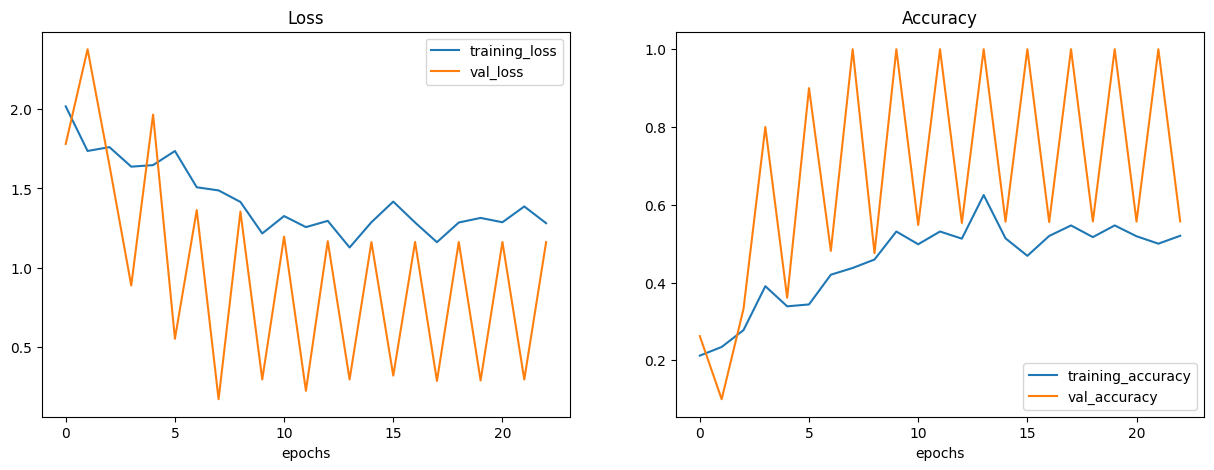

In [25]:
import matplotlib.pyplot as plt # Import the pyplot module and assign it the alias 'plt'

plot_curves(CNN_history) # Call the function to plot the curves

This image shows training and validation metrics for a model across epochs:

1. **Left: Loss**
   - Training loss decreases gradually, indicating the model is learning.
   - Validation loss is volatile, suggesting overfitting or instability.

2. **Right: Accuracy**
   - Training accuracy improves steadily.
   - Validation accuracy fluctuates significantly, indicating inconsistent generalization.

The model might require regularization (e.g., dropout, weight decay) or tuning of learning rate and early stopping patience.

In [27]:
import numpy as np
CNN_Predictions = CNN_Model.predict(test_data)

# Choosing highest probalbilty class in every prediction
CNN_Predictions = np.argmax(CNN_Predictions, axis=1)

113/113 ━━━━━━━━━━━━━━━━━━━━ 71s 626ms/step


In [28]:
test_data.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

Text(0.5, 1.0, 'CNN Confusion Matrix')

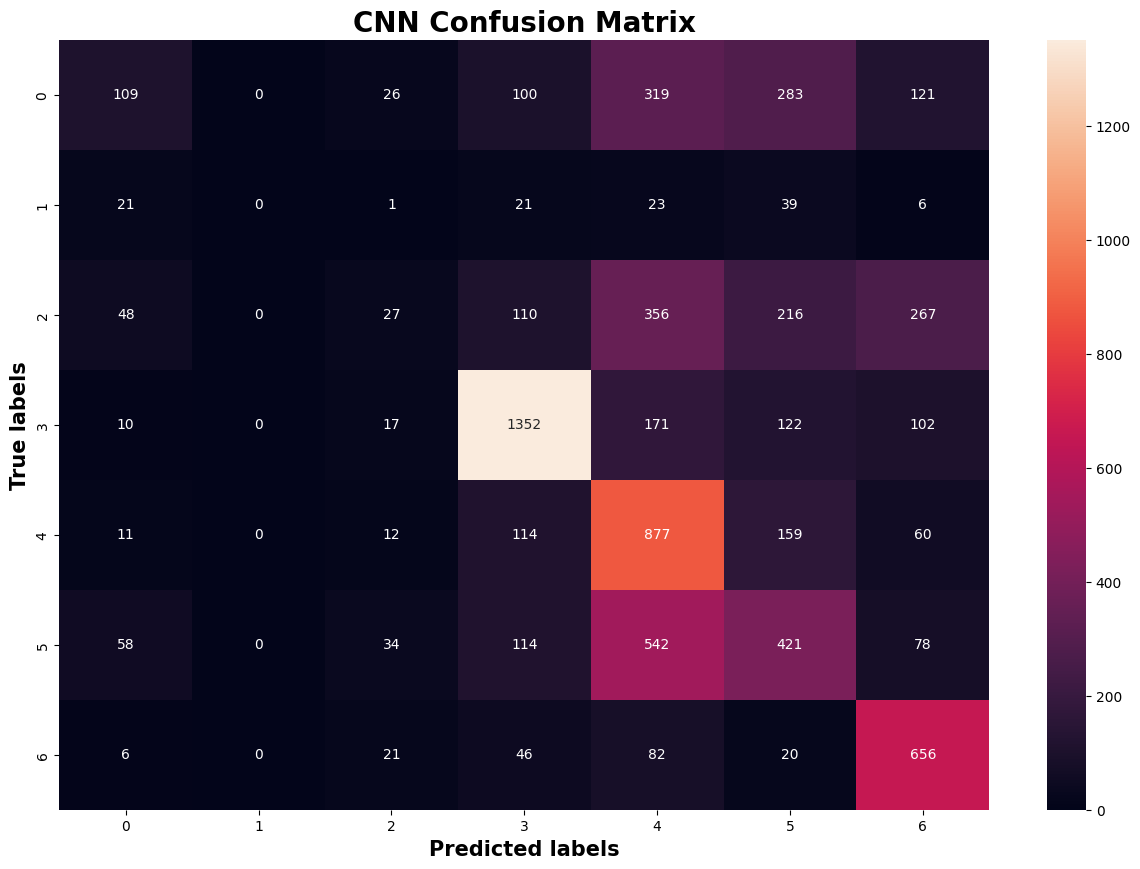

In [29]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

fig, ax= plt.subplots(figsize=(15,10))

cm=confusion_matrix(test_data.labels, CNN_Predictions)

sns.heatmap(cm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels',fontsize=15, fontweight='bold')
ax.set_ylabel('True labels', fontsize=15, fontweight='bold')
ax.set_title('CNN Confusion Matrix', fontsize=20, fontweight='bold')


This confusion matrix shows that the CNN model performs well for certain classes but struggles with others. For instance, class 3 has the highest number of correct predictions (1,352), indicating strong performance there. However, significant misclassifications occur in other classes, such as class 0, where many instances are incorrectly predicted as classes 3, 4, or 5. Similarly, class 2 has a wide spread of misclassifications across multiple classes. Overall, the model shows clear strengths in some areas but also demonstrates room for improvement in handling class imbalance or better distinguishing between similar classes.

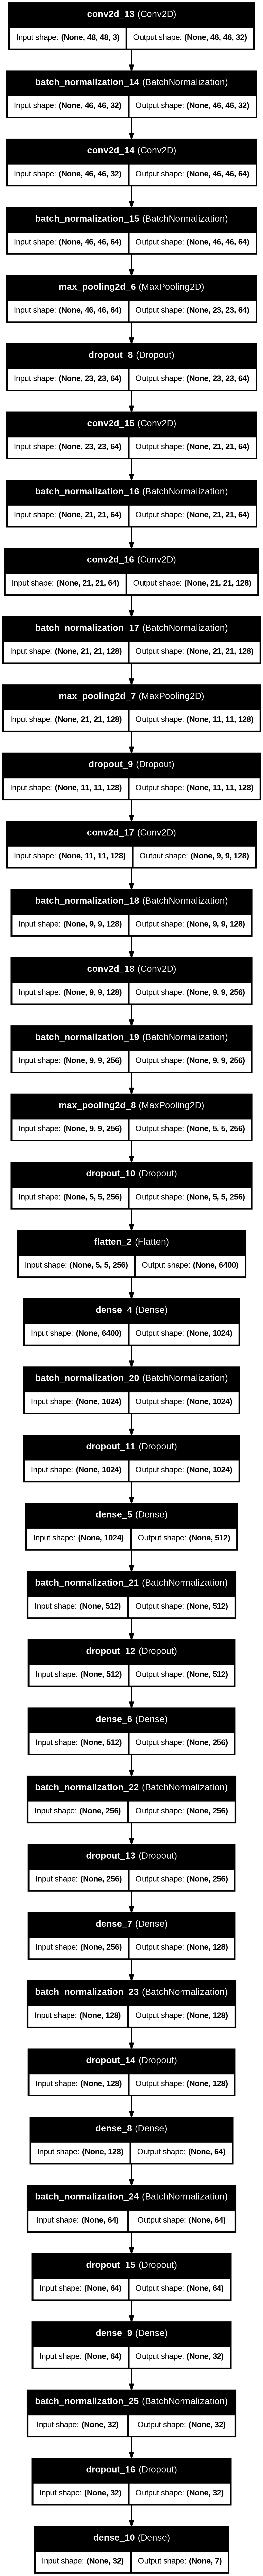

In [31]:

from tensorflow.keras.utils import plot_model # Import the plot_model function

plot_model(CNN_Model, to_file='model.png', show_shapes=True, show_layer_names=True)  # Use CNN_Model instead of 'model'

## **Fine Tuning CNN**

In [32]:
epochs = 200
batch_size = 64

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_accuracy',  # Monitor validation accuracy
    patience=15,            # Increase patience to 15 epochs
    restore_best_weights=True,
    min_delta=0.01         # Consider improvement only if it's greater than 0.01
)

history = model.fit(
    x=train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


359/359 ━━━━━━━━━━━━━━━━━━━━ 755s 2s/step - accuracy: 0.1680 - loss: 2.9679 - val_accuracy: 0.2500 - val_loss: 1.9506
Epoch 2/200
359/359 ━━━━━━━━━━━━━━━━━━━━ 759s 2s/step - accuracy: 0.2132 - loss: 2.4918 - val_accuracy: 0.3177 - val_loss: 1.8054
Epoch 3/200
359/359 ━━━━━━━━━━━━━━━━━━━━ 833s 2s/step - accuracy: 0.2582 - loss: 2.2245 - val_accuracy: 0.3471 - val_loss: 1.7401
Epoch 4/200
359/359 ━━━━━━━━━━━━━━━━━━━━ 756s 2s/step - accuracy: 0.2854 - loss: 2.0869 - val_accuracy: 0.3764 - val_loss: 1.6444
Epoch 5/200
359/359 ━━━━━━━━━━━━━━━━━━━━ 746s 2s/step - accuracy: 0.3123 - loss: 1.9720 - val_accuracy: 0.3883 - val_loss: 1.6176
Epoch 6/200
359/359 ━━━━━━━━━━━━━━━━━━━━ 752s 2s/step - accuracy: 0.3322 - loss: 1.9012 - val_accuracy: 0.4148 - val_loss: 1.5509
Epoch 7/200
359/359 ━━━━━━━━━━━━━━━━━━━━ 23661s 66s/step - accuracy: 0.3497 - loss: 1.8181 - val_accuracy: 0.4385 - val_loss: 1.4897
Epoch 8/200
359/359 ━━━━━━━━━━━━━━━━━━━━ 774s 2s/step - accuracy: 0.3695 - loss: 1.7515 - val_accur